In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data=pd.read_csv('C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\linear regression\\Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [63]:
data.shape

(30, 2)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [65]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [66]:
data.duplicated().sum()

0

In [67]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

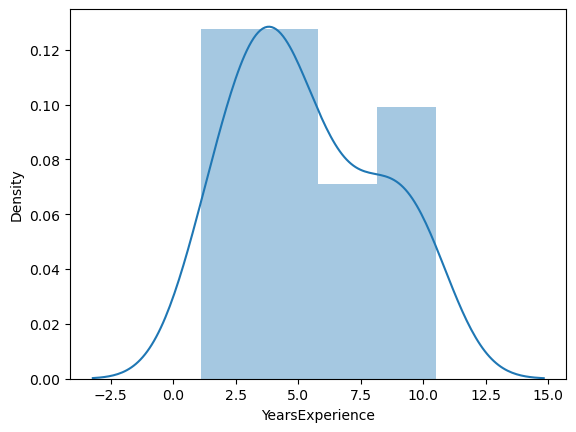

In [68]:
sns.distplot(data['YearsExperience'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

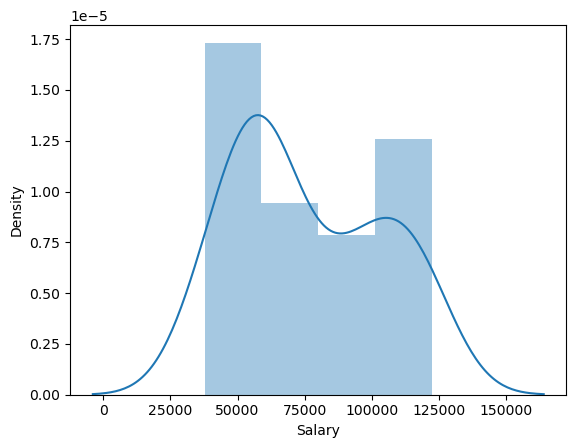

In [69]:
sns.distplot(data['Salary'])

<AxesSubplot:>

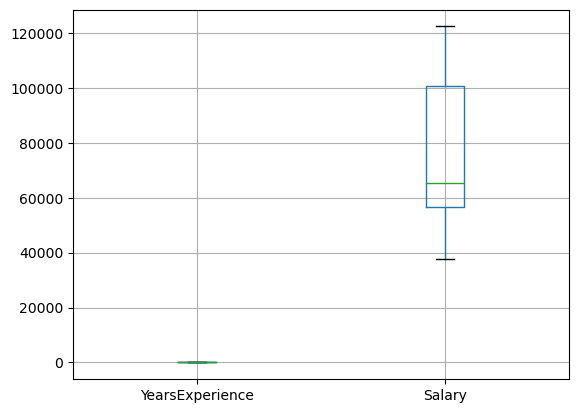

In [70]:
data.boxplot()

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

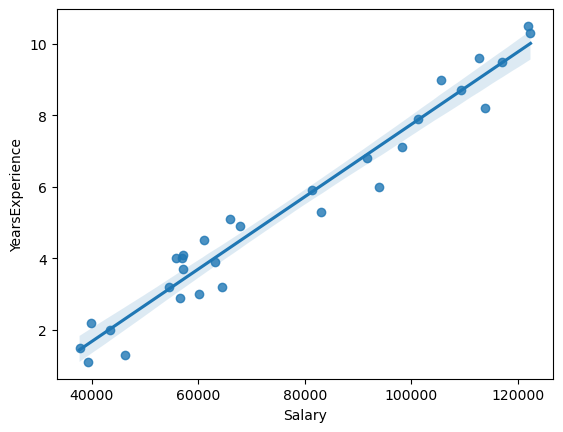

In [71]:
sns.regplot(x=data['Salary'],y=data['YearsExperience'],data=data)

# correlation analysis

In [72]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


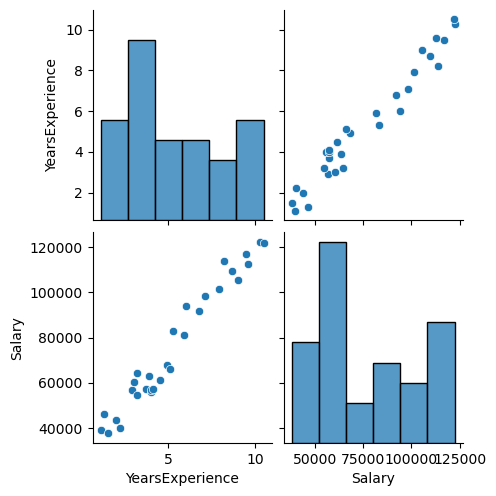

In [73]:
sns.pairplot(data)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Transformations

In [98]:
scaler=MinMaxScaler(feature_range=(0,1))
model=scaler.fit(data)
M_scaled=scaler.fit_transform(data.values)

In [99]:
data1=pd.DataFrame(M_scaled,columns=['Years_exp','Salary'])
data1.head()

,Years_exp,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [104]:
x=np.array(data1.Years_exp).reshape(-1,1)
y=np.array(data1.Salary).reshape(-1,1)

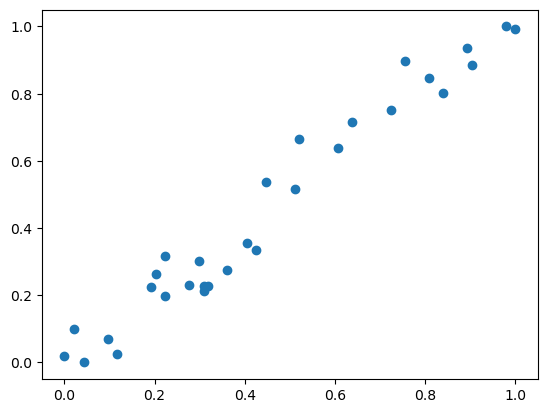

In [127]:
plt.scatter(x.flatten(),y.flatten())

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

<AxesSubplot:>

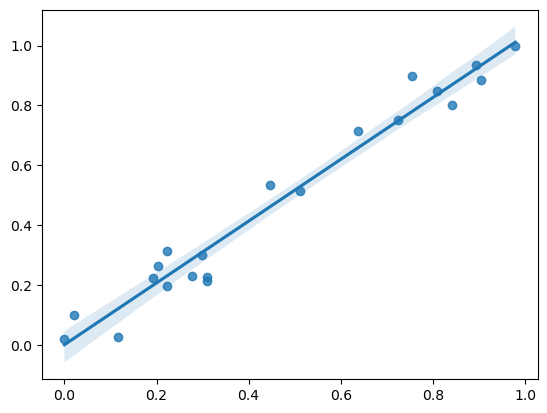

In [128]:
sns.regplot(x=x_train.flatten(),y=y_train.flatten())

# model building

In [107]:
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [109]:
regr.intercept_

array([0.00100354])

In [110]:
regr.coef_

array([[1.03213664]])

In [138]:
y_pred=regr.predict(x_test)
print(y_pred,y_test)

[[0.04492425]
 [0.44021062]
 [0.53903222]
 [0.37432956]
 [0.41825027]
 [0.33040885]
 [0.62687363]
 [0.09982513]
 [1.03314018]] [[0.        ]
 [0.33425467]
 [0.66393811]
 [0.27616348]
 [0.35680369]
 [0.2285613 ]
 [0.63792818]
 [0.06843846]
 [0.9938696 ]]


# creating the dataframe to store respective values

In [120]:
y_test_pred=pd.DataFrame({'actual':y_test.flatten(),'predicted':y_pred.flatten(),'residuals':y_test.flatten()-y_pred.flatten()})

In [122]:
y_test_pred['error_sqrd']=(y_test_pred['residuals'])**2

In [123]:
y_test_pred

,actual,predicted,residuals,error_sqrd
0,0.000000,0.044924,-0.044924,0.002018
1,0.334255,0.440211,-0.105956,0.011227
2,0.663938,0.539032,0.124906,0.015601
3,0.276163,0.374330,-0.098166,0.009637
4,0.356804,0.418250,-0.061447,0.003776
5,0.228561,0.330409,-0.101848,0.010373
6,0.637928,0.626874,0.011055,0.000122
7,0.068438,0.099825,-0.031387,0.000985
8,0.993870,1.033140,-0.039271,0.001542


In [124]:
from sklearn import metrics

In [126]:
r2=metrics.r2_score(y_train,regr.predict(x_train))
print('R squared',r2)

R squared 0.9634588749068316


# residual analysis

<AxesSubplot:>

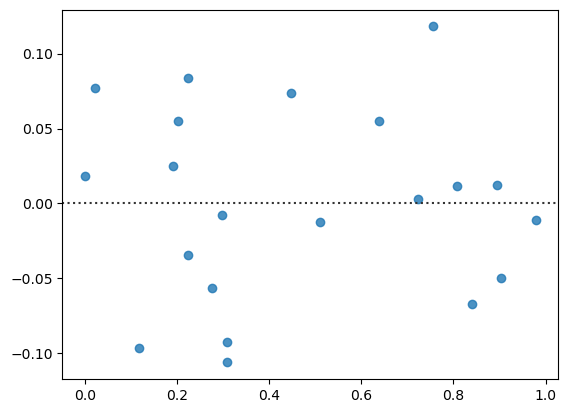

In [132]:
sns.residplot(x=x_train.flatten(),y=y_train.flatten())

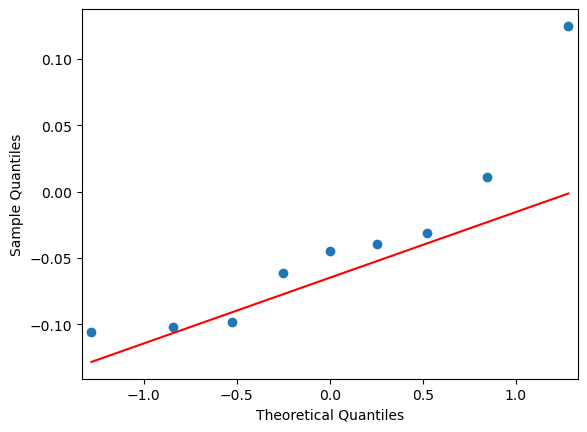

In [135]:
resid=sm.qqplot(y_test_pred['residuals'],line='q')